<a href="https://colab.research.google.com/github/ukablahblah/MentalHealthAppReview/blob/main/MentalHealthApp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install google-play-scraper


     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 50.2/50.2 kB 3.9 MB/s eta 0:00:00


In [3]:
from google_play_scraper import reviews
import pandas as pd

apps = {
    "Calm": "com.calm.android",
    "BetterHelp": "com.betterhelp",
    "Youper": "br.com.youper",
    "Shine": "com.shinetext.shine",
    "Wysa": "bot.touchkin",
    "Happify": "com.happify.happifyinc",
    "MindDoc": "de.moodpath.android",
    "Insight Timer": "com.spotlightsix.zentimerlite2",
    "Aura": "com.aurahealth",
    "Simple Habit": "com.simplehabit.simplehabitapp"
}



all_reviews = []

for app_name, package in apps.items():
    print(f"Scraping {app_name}...")
    result, _ = reviews(
        package,
        lang='en',
        country='us',
        count=5000,
        filter_score_with=None
    )

    if not result:
        print(f"‚ö†Ô∏è No reviews found for {app_name}. Skipping.")
        continue

    # Check for required keys
    sample = result[0]
    expected_keys = ['userName', 'score', 'at', 'content']
    if not all(key in sample for key in expected_keys):
        print(f"‚ö†Ô∏è Unexpected format for {app_name}. Skipping.")
        continue

    df = pd.DataFrame(result)[['userName', 'score', 'at', 'content']]
    df.columns = ['user', 'rating', 'date', 'review']
    df['app'] = app_name
    all_reviews.append(df)

# Combine if there's any data
if all_reviews:
    df_all = pd.concat(all_reviews)
    df_all.to_csv("mental_health_reviews.csv", index=False)
    print("‚úÖ Done. Saved as 'mental_health_reviews.csv'")
else:
    print("‚ùå No valid review data scraped.")


Scraping Calm...
Scraping BetterHelp...
Scraping Youper...
Scraping Shine...
Scraping Wysa...
Scraping Happify...
Scraping MindDoc...
Scraping Insight Timer...
Scraping Aura...
Scraping Simple Habit...
‚úÖ Done. Saved as 'mental_health_reviews.csv'


In [4]:
import pandas as pd

df = pd.read_csv("mental_health_reviews.csv")
df.head()
df['app'].value_counts()


app
Calm             5000
BetterHelp       5000
Youper           5000
Wysa             5000
MindDoc          5000
Insight Timer    5000
Simple Habit     5000
Shine            4456
Aura             4084
Happify          1096
Name: count, dtype: int64

In [5]:
!pip install nltk textblob

import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
import re

nltk.download('stopwords')
nltk.download('wordnet')

# Load data
df = pd.read_csv("mental_health_reviews.csv")

# Remove duplicates based on user + date + review text
df = df.drop_duplicates(subset=['user', 'date', 'review'])

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Setup for cleaning
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    return " ".join(tokens)

# Clean reviews
df['clean_review'] = df['review'].apply(clean_text)

# Sentiment polarity (-1 to 1)
df['sentiment'] = df['clean_review'].apply(lambda x: TextBlob(x).sentiment.polarity)

df.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


user  rating                date  \
0  A Google user       5 2025-07-21 00:11:24   
1  A Google user       1 2025-07-20 22:17:08   
2  A Google user       2 2025-07-20 17:29:13   
3  A Google user       5 2025-07-20 13:14:33   
4  A Google user       5 2025-07-20 10:52:59   

                                              review   app  \
0  love this. Just starting to try and work on my...  Calm   
1                        because it has no pop music  Calm   
2               At least I found the Calmings again!  Calm   
3  I have used the app for 4+ years and absolutel...  Calm   
4                           Established essential ‚ú®Ô∏è  Calm   

                                        clean_review  sentiment  
0                     love starting try work amazing   0.366667  
1                                          pop music   0.000000  
2                                least found calming  -0.300000  
3  used app year absolutely love however recently...   0.250000  
4                              established essential   0.000000

In [6]:
!pip install matplotlib seaborn pandas nltk textblob

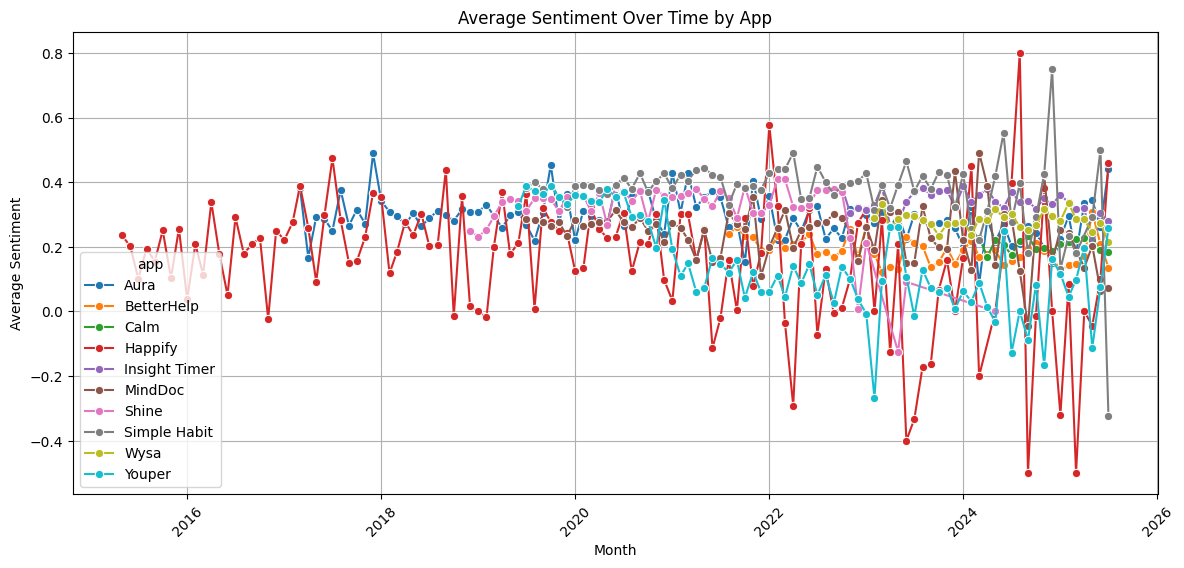

/tmp/ipython-input-7-1817949837.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=installs_df, x='app', y='installs', palette='gray')


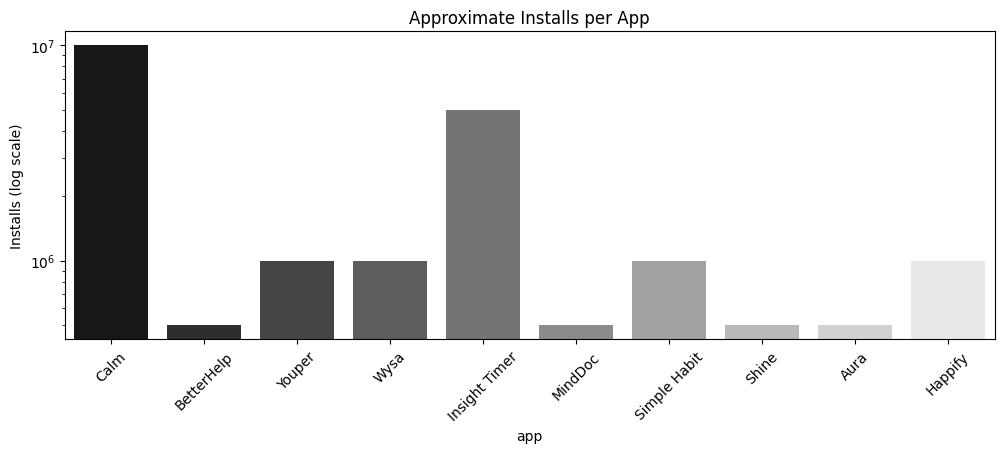

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare sentiment data
df['month'] = df['date'].dt.to_period('M')
sentiment_time = df.groupby(['app', 'month'])['sentiment'].mean().reset_index()
sentiment_time['month'] = sentiment_time['month'].dt.to_timestamp()

# Installs dict
installs = {
    "Calm": 10000000,
    "BetterHelp": 500000,
    "Youper": 1000000,
    "Wysa": 1000000,
    "Insight Timer": 5000000,
    "MindDoc": 500000,
    "Simple Habit": 1000000,
    "Shine": 500000,
    "Aura": 500000,
    "Happify": 1000000
}
installs_df = pd.DataFrame(list(installs.items()), columns=['app', 'installs'])

# Plot sentiment trends
plt.figure(figsize=(14, 6))
sns.lineplot(data=sentiment_time, x='month', y='sentiment', hue='app', marker='o')
plt.title('Average Sentiment Over Time by App')
plt.xlabel('Month')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plot installs bar chart separately
plt.figure(figsize=(12, 4))
sns.barplot(data=installs_df, x='app', y='installs', palette='gray')
plt.yscale('log')
plt.ylabel('Installs (log scale)')
plt.title('Approximate Installs per App')
plt.xticks(rotation=45)
plt.show()


In [8]:
!pip install gensim nltk

In [9]:
import gensim
from gensim import corpora
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

# Filter negative reviews
neg_reviews = df[df['sentiment'] < 0]['clean_review'].tolist()

# Tokenize
tokenized_reviews = [review.split() for review in neg_reviews]

# Remove stopwords again (optional safety)
stop_words = set(nltk.corpus.stopwords.words('english'))
tokenized_reviews = [[word for word in doc if word not in stop_words] for doc in tokenized_reviews]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
dictionary = corpora.Dictionary(tokenized_reviews)
corpus = [dictionary.doc2bow(text) for text in tokenized_reviews]


In [11]:
lda_model = gensim.models.LdaModel(
    corpus,
    num_topics=5,
    id2word=dictionary,
    passes=10,
    random_state=42
)


In [12]:
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx + 1}:")
    print(topic)
    print()


Topic 1:
0.039*"app" + 0.019*"meditation" + 0.016*"day" + 0.015*"time" + 0.010*"ive" + 0.008*"im" + 0.007*"long" + 0.007*"even" + 0.006*"feel" + 0.006*"using"

Topic 2:
0.043*"app" + 0.014*"like" + 0.012*"time" + 0.012*"help" + 0.012*"im" + 0.011*"really" + 0.010*"one" + 0.010*"get" + 0.009*"meditation" + 0.008*"dont"

Topic 3:
0.040*"app" + 0.033*"mental" + 0.029*"health" + 0.013*"helpful" + 0.011*"help" + 0.010*"people" + 0.008*"worst" + 0.008*"data" + 0.008*"extremely" + 0.007*"ever"

Topic 4:
0.025*"app" + 0.020*"money" + 0.017*"subscription" + 0.016*"waste" + 0.013*"expensive" + 0.013*"time" + 0.012*"cancel" + 0.012*"dont" + 0.010*"even" + 0.010*"trial"

Topic 5:
0.024*"help" + 0.023*"app" + 0.019*"pay" + 0.012*"free" + 0.011*"like" + 0.010*"people" + 0.008*"u" + 0.008*"hate" + 0.008*"expensive" + 0.007*"content"



In [15]:
from gensim.utils import simple_preprocess
from gensim import corpora
from gensim.models import LdaModel
from nltk.corpus import stopwords
import nltk

# Download once
nltk.download('stopwords')

# Define stopwords
stop_words = set(stopwords.words('english'))
custom_stopwords = {'app', 'im', 'ive', 'like', 'get', 'even', 'really', 'dont', 'one', 'use', 'used', 'time'}
stop_words.update(custom_stopwords)

# Clean and tokenize reviews
neg_reviews = df[df['sentiment'] < 0]['clean_review'].tolist()

tokenized_reviews = [
    [word for word in simple_preprocess(doc) if word not in stop_words]
    for doc in neg_reviews
]

# Remove short ones
tokenized_reviews = [doc for doc in tokenized_reviews if len(doc) > 2]

# Create dictionary and corpus
dictionary = corpora.Dictionary(tokenized_reviews)
corpus = [dictionary.doc2bow(text) for text in tokenized_reviews]

# Train LDA model
lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=5,
    passes=10,
    random_state=42
)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
!pip install pyLDAvis


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.6/2.6 MB 48.7 MB/s eta 0:00:00


In [17]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)


In [22]:
texts = tokenized_reviews

# Trim original dataframe to match length of texts
df_cleaned = df[df['sentiment'] < 0].iloc[:len(texts)].copy()

# LDA topic inference
topics_per_doc = lda_model[corpus]
doc_topics = [max(doc, key=lambda x: x[1])[0] for doc in topics_per_doc]

# Assign topics
df_cleaned['dominant_topic'] = doc_topics

topic_labels = {
    0: "Therapist Support & Mental Health Sessions",
    1: "Subscription and Billing Complaints",
    2: "Guided Meditation and Daily Habits",
    3: "Positive Impact & Emotional Benefits",
    4: "App Performance Issues"
}
df_cleaned['topic_label'] = df_cleaned['dominant_topic'].map(topic_labels)


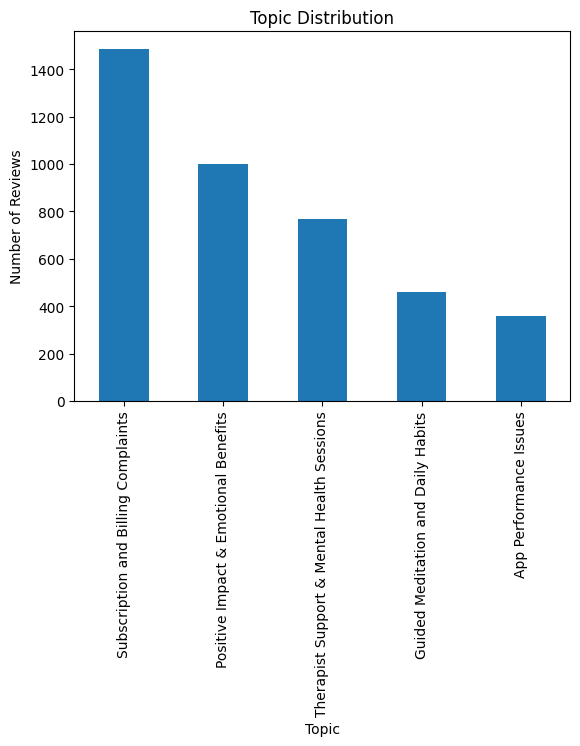

In [23]:
import matplotlib.pyplot as plt

df_cleaned['topic_label'].value_counts().plot(kind='bar', title='Topic Distribution')
plt.xlabel('Topic')
plt.ylabel('Number of Reviews')
plt.show()


In [24]:
for topic in df_cleaned['dominant_topic'].unique():
    print(f"\nTopic {topic} ‚Äî {topic_labels[topic]}")
    print(df_cleaned[df_cleaned['dominant_topic'] == topic]['review'].sample(3, random_state=1).to_string(index=False))



Topic 4 ‚Äî App Performance Issues
It's a decent app, but there's a serious notifi...
Too complicated! When truly anxious, concentrat...
                                Unable to open app

Topic 1 ‚Äî Subscription and Billing Complaints
                                   waste of money.
The fact that there's not opinion to put in you...
Wasted my time as I didn't realize it was a tri...

Topic 0 ‚Äî Therapist Support & Mental Health Sessions
App worked smoothly and is easy to navigate. Th...
              Everything is locked behind paywall.
Not free at all, it keeps demanding I pay for a...

Topic 2 ‚Äî Guided Meditation and Daily Habits
                    awful üòê everything is premium!
All therapists I've had with this app were extr...
I like when it asks me how I'm doing three time...

Topic 3 ‚Äî Positive Impact & Emotional Benefits
Your daily notifications and affirmations are s...
The only difficult I found is that it doesn't w...
I really liked and depended on using this fo